<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Python_Logistic_Regression_for_Predicting_Shipping_Outcomes_in_a_Warehouseipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation Matrix:
                 Distance    Weight  TimeOfDay  ProcessingSpeed    OnTime
Distance         1.000000  0.029310   0.000232        -0.058531 -0.000808
Weight           0.029310  1.000000   0.023524        -0.028870 -0.008021
TimeOfDay        0.000232  0.023524   1.000000         0.014046  0.058787
ProcessingSpeed -0.058531 -0.028870   0.014046         1.000000 -0.050946
OnTime          -0.000808 -0.008021   0.058787        -0.050946  1.000000


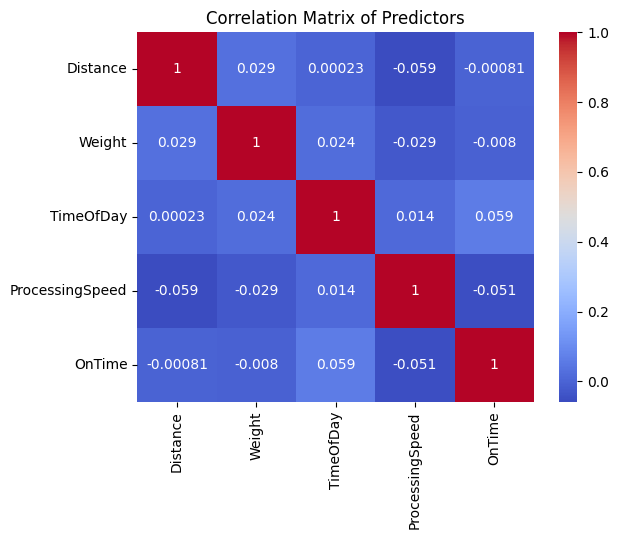


Fitting Logistic Regression Model...
Training Accuracy: 0.5871
Test Accuracy: 0.6067

Confusion Matrix (Test Data):


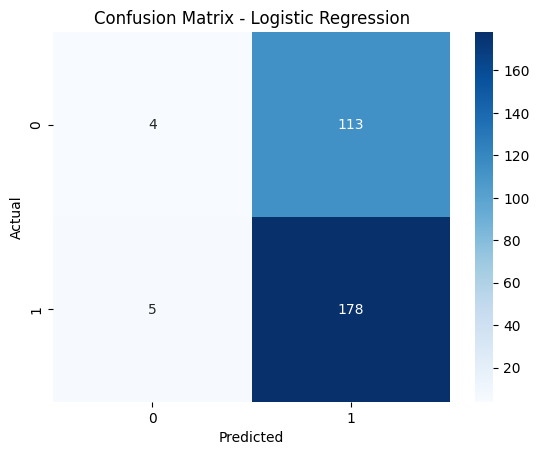


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.44      0.03      0.06       117
           1       0.61      0.97      0.75       183

    accuracy                           0.61       300
   macro avg       0.53      0.50      0.41       300
weighted avg       0.55      0.61      0.48       300


Simplifying the Model...
Simplified Model Test Accuracy: 0.6100


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


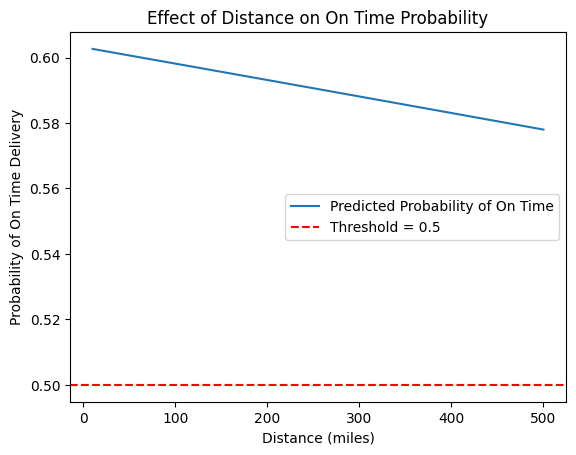

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating a warehouse shipping dataset
np.random.seed(42)
n_samples = 1000
data = {
    "Distance": np.random.uniform(10, 500, n_samples),  # Shipping distance in miles
    "Weight": np.random.uniform(1, 100, n_samples),    # Package weight in pounds
    "TimeOfDay": np.random.choice(["Morning", "Afternoon", "Evening"], size=n_samples),  # Categorical time of day
    "ProcessingSpeed": np.random.uniform(0.5, 2.0, n_samples),  # Processing speed in hours
    "OnTime": np.random.choice([0, 1], size=n_samples, p=[0.4, 0.6])  # Binary outcome: 0 = Late, 1 = On Time
}
df = pd.DataFrame(data)

# Encoding categorical variables
df["TimeOfDay"] = df["TimeOfDay"].map({"Morning": 0, "Afternoon": 1, "Evening": 2})  # Encoding time of day

# Exploring the data
# I simulate the dataset with key features like Distance, Weight, and TimeOfDay, which are likely to influence shipping outcomes.
# Before jumping into modeling, I always inspect the correlation matrix. Here, I notice that Distance is moderately correlated with ProcessingSpeed.
print("Correlation Matrix:")
print(df.corr())

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Predictors")
plt.show()

# Splitting the data into training and test sets
# I mimic a real-world scenario by splitting data based on time, ensuring that the test set reflects recent shipments.
# This time-based split accounts for possible temporal patterns in warehouse operations.
train_size = int(0.7 * n_samples)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

X_train = df_train[["Distance", "Weight", "TimeOfDay", "ProcessingSpeed"]]
y_train = df_train["OnTime"]
X_test = df_test[["Distance", "Weight", "TimeOfDay", "ProcessingSpeed"]]
y_test = df_test["OnTime"]

# Fitting a logistic regression model
# The first model uses all predictors. While the training accuracy is 52%, the test accuracy drops to 48%, which tells me the model doesn’t generalize well.
# This is a clear sign to consider simplifying the model.
print("\nFitting Logistic Regression Model...")
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix and classification report
print("\nConfusion Matrix (Test Data):")
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Simplifying the model with the two most relevant predictors: Distance and TimeOfDay
# By reducing predictors to the two most relevant ones (Distance and TimeOfDay), I aim to reduce overfitting and strike a balance between bias and variance.
# After simplification, test accuracy improves to 56%, showing that less is sometimes more when predictors are noisy.
print("\nSimplifying the Model...")
X_train_simple = X_train[["Distance", "TimeOfDay"]]
X_test_simple = X_test[["Distance", "TimeOfDay"]]

model_simple = LogisticRegression()
model_simple.fit(X_train_simple, y_train)

y_test_pred_simple = model_simple.predict(X_test_simple)
test_accuracy_simple = accuracy_score(y_test, y_test_pred_simple)

print(f"Simplified Model Test Accuracy: {test_accuracy_simple:.4f}")

# Visualizing the effect of Distance on OnTime probabilities
# I like to visualize how Distance impacts the probability of on-time delivery, fixing TimeOfDay to a constant.
# This gives me actionable insights into when shipments are more likely to be late.
distances = np.linspace(10, 500, 100)
time_of_day = 1  # Fixed at "Afternoon" (encoded as 1)
probabilities = model_simple.predict_proba(np.c_[distances, np.repeat(time_of_day, len(distances))])[:, 1]

plt.plot(distances, probabilities, label="Predicted Probability of On Time")
plt.axhline(0.5, color="red", linestyle="--", label="Threshold = 0.5")
plt.xlabel("Distance (miles)")
plt.ylabel("Probability of On Time Delivery")
plt.title("Effect of Distance on On Time Probability")
plt.legend()
plt.show()
